In [1]:
from sklearn import tree
from sklearn.datasets import load_wine #sklearn当中自带的数据库，包含非常经典的红酒数据集
from sklearn.model_selection import train_test_split

In [2]:
wine = load_wine() #导入红酒数据集
wine 

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [3]:
wine.data.shape #查看数据的形状大小

(178, 13)

In [4]:
wine.target #查看数据的标签

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
import pandas as pd
pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)],axis = 1) #将标签与原始数据进行拼接

0     1     2     3      4     5     6     7     8      9     10  \
0    14.23  1.71  2.43  15.6  127.0  2.80  3.06  0.28  2.29   5.64  1.04   
1    13.20  1.78  2.14  11.2  100.0  2.65  2.76  0.26  1.28   4.38  1.05   
2    13.16  2.36  2.67  18.6  101.0  2.80  3.24  0.30  2.81   5.68  1.03   
3    14.37  1.95  2.50  16.8  113.0  3.85  3.49  0.24  2.18   7.80  0.86   
4    13.24  2.59  2.87  21.0  118.0  2.80  2.69  0.39  1.82   4.32  1.04   
..     ...   ...   ...   ...    ...   ...   ...   ...   ...    ...   ...   
173  13.71  5.65  2.45  20.5   95.0  1.68  0.61  0.52  1.06   7.70  0.64   
174  13.40  3.91  2.48  23.0  102.0  1.80  0.75  0.43  1.41   7.30  0.70   
175  13.27  4.28  2.26  20.0  120.0  1.59  0.69  0.43  1.35  10.20  0.59   
176  13.17  2.59  2.37  20.0  120.0  1.65  0.68  0.53  1.46   9.30  0.60   
177  14.13  4.10  2.74  24.5   96.0  2.05  0.76  0.56  1.35   9.20  0.61   

       11      12  0   
0    3.92  1065.0   0  
1    3.40  1050.0   0  
2    3.17  1185.0   0  
3    3.45  1480.0   0  
4    2.93   735.0   0  
..    ...     ...  ..  
173  1.74   740.0   2  
174  1.56   750.0   2  
175  1.56   835.0   2  
176  1.62   840.0   2  
177  1.60   560.0   2  

[178 rows x 14 columns]

In [6]:
wine.feature_names #特征的名称

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [7]:
wine.target_names #标签名称

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [8]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data, wine.target,test_size = 0.3) #37分测试集和训练集

In [9]:
Xtrain.shape 

(124, 13)

In [44]:
#导入分类树实例且训练和打分
clf = tree.DecisionTreeClassifier(criterion = "entropy" #选择不纯度的计算方法
                                  ,random_state=3 #控制随机性
                                  ,splitter="random" #特征选择方法
                                 )  
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

0.9629629629629629

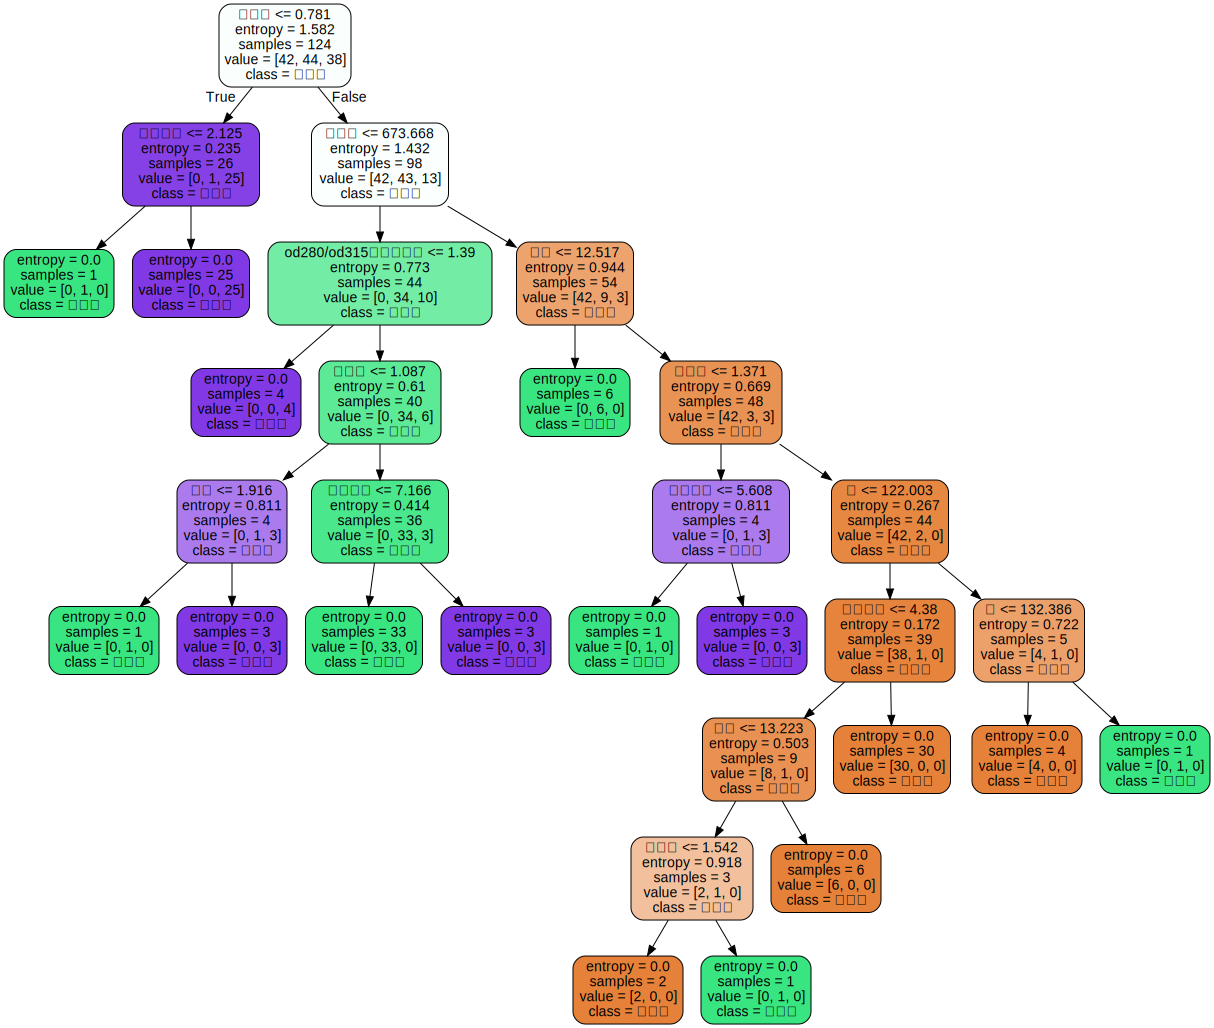

In [45]:
import graphviz #绘树状图库
features = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
dot_data = tree.export_graphviz(clf
        ,feature_names = features
        ,class_names = ["伏特加", "威士忌", "白兰地"]
        ,filled = True
        ,rounded = True
        )
graph = graphviz.Source(dot_data) #各项分数计算
graph

In [46]:
clf.feature_importances_ #特征重要性属性

array([0.10542819, 0.        , 0.        , 0.        , 0.02562714,
       0.01653925, 0.37267841, 0.        , 0.01404074, 0.13474389,
       0.        , 0.04907252, 0.28186987])

In [47]:
[*zip(features,clf.feature_importances_)] #详细的展示特征重要性

[('酒精', 0.10542819017131941),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.025627139858852666),
 ('总酚', 0.01653924801714775),
 ('类黄酮', 0.37267840857865425),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.014040735933807832),
 ('颜色强度', 0.13474388528404616),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.04907252325539937),
 ('脯氨酸', 0.2818698689007727)]

In [58]:
clf = tree.DecisionTreeClassifier(
            criterion="entropy"
            ,random_state=3
            ,splitter="random"
             ,max_depth=5
             ,min_samples_leaf=2
             # ,min_samples_split=9 #探究分支策略对分数的影响
            )
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

0.9814814814814815

In [65]:
clf.apply(Xtest) #测试样本点的叶子的索引

array([27, 27, 12, 12,  3, 27, 12, 12,  3, 12, 27,  6, 12, 29, 12, 27, 27,
       27,  3,  9,  6, 26, 27, 12,  3, 15, 12, 12, 12, 26, 27, 15, 12, 15,
       27, 12,  3, 12, 27, 12, 15, 24, 27, 12, 12,  3, 12, 12, 27, 12, 12,
       12, 12, 12], dtype=int64)

In [66]:
clf.predict(Xtest) #测试样本点的标签

array([0, 0, 1, 1, 2, 0, 1, 1, 2, 1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 1, 2, 0,
       0, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 1,
       1, 2, 1, 1, 0, 1, 1, 1, 1, 1])

C:\Users\作者\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21442 (\N{CJK UNIFIED IDEOGRAPH-53C2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\作者\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


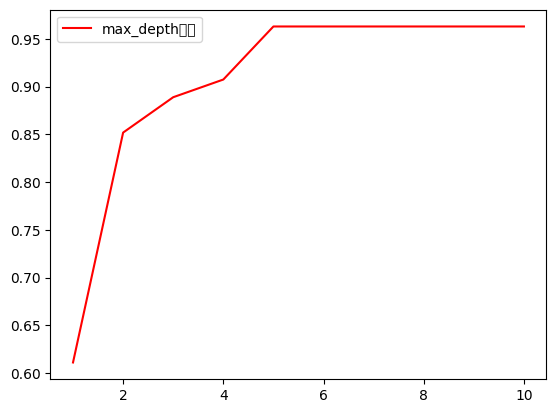

In [67]:
#超参数学习曲线（可更换不同的参数探究）
import matplotlib.pyplot as plt
empty=[]
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
            ,criterion="entropy"
            ,splitter="random"
            ,random_state=3
            )
    clf = clf.fit(Xtrain,Ytrain)
    score = clf.score(Xtest,Ytest)
    empty.append(score)
plt.plot(range(1,11), empty, color="red", label="max_depth参数")
plt.legend()
plt.show() 

**觉得很抽象，先别急，这只是分类树实例的训练，接下来还有回归数实例以及完整的kaggle预测泰坦尼克号幸存人员。相信您完整看完之后会有一定的收获哈，最后祝您我变得更强!**